### DSC 4320 Final Project
Brock Carey, Emily Liau

**Environment Set-Up**

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import category_encoders as ce
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

**Data Pre-Processing: Exploratory Data Analysis**

In [3]:
pwd

'C:\\Users\\bacar\\4320\\Final Project\\callpredict'

In [4]:
# import data into environment
data = pd.read_csv('C:/Users/bacar/4320/Final Project/callpredict/data.csv', sep=',')
data

,DATE_FOR,RTD_ST_CD,CustomerSegment,Tenure,Age,MART_STATUS,GENDER,CHANNEL1_6M,CHANNEL2_6M,CHANNEL3_6M,...,CHANNEL5_3M,METHOD1_3M,PAYMENTS_3M,NOT_DI_3M,NOT_DI_6M,EVENT1_30_FLAG,EVENT2_90_SUM,LOGINS,POLICYPURCHASECHANNEL,Call_Flag
0,5/19/2014,ST_S0,1,16.175222,78.403833,MS_S0,F,0.0,0.0,1.0,...,2,0,3,0,0,0,0,0,0,0
1,5/17/2014,ST_S0,1,15.931554,70.989733,MS_S1,F,0.0,6.0,0.0,...,0,3,3,0,0,0,0,0,0,0
2,5/15/2014,ST_S0,1,15.937029,87.578371,MS_S2,M,0.0,0.0,10.0,...,0,0,6,0,0,0,0,0,0,0
3,5/16/2014,ST_S1,1,15.934292,68.438056,MS_S2,M,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,1,0
4,5/20/2014,ST_S0,1,15.501711,80.514716,MS_S0,F,0.0,0.0,1.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130081,5/17/2014,ST_S16,NONE,0.131417,46.258727,MS_S2,M,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
130082,5/19/2014,ST_S41,NONE,0.117728,36.574949,MS_S1,M,0.0,0.0,0.0,...,0,0,2,0,0,0,0,0,0,0
130083,5/16/2014,ST_S14,NONE,0.131417,56.906229,MS_S3,M,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
130084,5/15/2014,ST_S14,NONE,0.087611,23.857632,MS_S2,M,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0


In [5]:
# check data types of columns
data_types = data.dtypes
data_types

DATE_FOR                  object
RTD_ST_CD                 object
CustomerSegment           object
Tenure                   float64
Age                      float64
MART_STATUS               object
GENDER                    object
CHANNEL1_6M              float64
CHANNEL2_6M              float64
CHANNEL3_6M              float64
CHANNEL4_6M              float64
CHANNEL5_6M              float64
METHOD1_6M               float64
RECENT_PAYMENT           float64
PAYMENTS_6M              float64
CHANNEL1_3M                int64
CHANNEL2_3M                int64
CHANNEL3_3M                int64
CHANNEL4_3M                int64
CHANNEL5_3M                int64
METHOD1_3M                 int64
PAYMENTS_3M                int64
NOT_DI_3M                  int64
NOT_DI_6M                  int64
EVENT1_30_FLAG             int64
EVENT2_90_SUM              int64
LOGINS                     int64
POLICYPURCHASECHANNEL      int64
Call_Flag                  int64
dtype: object

In [6]:
# convert 'DATE_FOR' from object to datetime format
data['DATE_FOR'] = pd.to_datetime(data['DATE_FOR'])
data['YEAR'] = data['DATE_FOR'].dt.year
data['MONTH'] = data['DATE_FOR'].dt.month
data['DAY'] = data['DATE_FOR'].dt.day
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130086 entries, 0 to 130085
Data columns (total 32 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   DATE_FOR               130086 non-null  datetime64[ns]
 1   RTD_ST_CD              130086 non-null  object        
 2   CustomerSegment        130086 non-null  object        
 3   Tenure                 130086 non-null  float64       
 4   Age                    130086 non-null  float64       
 5   MART_STATUS            130086 non-null  object        
 6   GENDER                 130086 non-null  object        
 7   CHANNEL1_6M            129277 non-null  float64       
 8   CHANNEL2_6M            129277 non-null  float64       
 9   CHANNEL3_6M            129277 non-null  float64       
 10  CHANNEL4_6M            129277 non-null  float64       
 11  CHANNEL5_6M            129277 non-null  float64       
 12  METHOD1_6M             129277 non-null  floa

In [7]:
# remove 'DATE_FOR' column from dataframe to prevent redundancy
data.drop('DATE_FOR', axis=1, inplace=True)
data

,RTD_ST_CD,CustomerSegment,Tenure,Age,MART_STATUS,GENDER,CHANNEL1_6M,CHANNEL2_6M,CHANNEL3_6M,CHANNEL4_6M,...,NOT_DI_3M,NOT_DI_6M,EVENT1_30_FLAG,EVENT2_90_SUM,LOGINS,POLICYPURCHASECHANNEL,Call_Flag,YEAR,MONTH,DAY
0,ST_S0,1,16.175222,78.403833,MS_S0,F,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,2014,5,19
1,ST_S0,1,15.931554,70.989733,MS_S1,F,0.0,6.0,0.0,0.0,...,0,0,0,0,0,0,0,2014,5,17
2,ST_S0,1,15.937029,87.578371,MS_S2,M,0.0,0.0,10.0,0.0,...,0,0,0,0,0,0,0,2014,5,15
3,ST_S1,1,15.934292,68.438056,MS_S2,M,0.0,0.0,1.0,0.0,...,0,0,0,0,0,1,0,2014,5,16
4,ST_S0,1,15.501711,80.514716,MS_S0,F,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,2014,5,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130081,ST_S16,NONE,0.131417,46.258727,MS_S2,M,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,2014,5,17
130082,ST_S41,NONE,0.117728,36.574949,MS_S1,M,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,2014,5,19
130083,ST_S14,NONE,0.131417,56.906229,MS_S3,M,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,2014,5,16
130084,ST_S14,NONE,0.087611,23.857632,MS_S2,M,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,2014,5,15


In [8]:
# identify categorical variables
categorical_vars = [var for var in data.columns if data[var].dtype == 'O']
print("There are {} categorical variables.".format(len(categorical_vars)))
print("The categorical variables are: ", categorical_vars)

There are 4 categorical variables.
The categorical variables are:  ['RTD_ST_CD', 'CustomerSegment', 'MART_STATUS', 'GENDER']


In [9]:
# check frequency counts of categorical variables
for var in categorical_vars:
    print(data[var].value_counts())
    print(data[var].value_counts() / float(len(data)))
    print(var, " contains ", len(data[var].unique()), " labels.")

RTD_ST_CD
ST_S7     24475
ST_S9     18834
ST_S0      8512
ST_S14     7690
ST_S4      6316
ST_S42     5917
ST_S22     5691
ST_S6      4814
ST_S11     4258
ST_S3      3133
ST_S16     3034
ST_S25     2635
ST_S20     2427
ST_S33     2332
ST_S12     2270
ST_S2      1920
ST_S39     1854
ST_S32     1804
ST_S38     1660
ST_S24     1660
ST_S21     1316
ST_S10     1164
ST_S1      1151
ST_S44     1046
ST_S8      1044
ST_S17      949
ST_S13      934
ST_S50      847
ST_S19      724
ST_S28      710
ST_S40      668
ST_S15      615
ST_S35      598
ST_S41      597
ST_S48      579
ST_S27      547
ST_S18      544
ST_S36      535
ST_S31      517
ST_S29      502
ST_S34      499
ST_S37      481
ST_S23      438
ST_S43      398
ST_S45      326
ST_S26      315
ST_S30      279
ST_S5       178
ST_S47      159
ST_S46       97
ST_S49       93
Name: count, dtype: int64
RTD_ST_CD
ST_S7     0.188145
ST_S9     0.144781
ST_S0     0.065434
ST_S14    0.059115
ST_S4     0.048552
ST_S42    0.045485
ST_S22    0.043748
ST_S6

In [10]:
# identify the presence of NA values in categorical variables
print(data[categorical_vars].isnull().sum())

RTD_ST_CD          0
CustomerSegment    0
MART_STATUS        0
GENDER             0
dtype: int64


In [11]:
# identify numerical variables
numerical_vars = [var for var in data.columns if data[var].dtype != 'O']
print("There are {} numerical variables.".format(len(numerical_vars)))
print("The numerical variables are: ", numerical_vars)

There are 27 numerical variables.
The numerical variables are:  ['Tenure', 'Age', 'CHANNEL1_6M', 'CHANNEL2_6M', 'CHANNEL3_6M', 'CHANNEL4_6M', 'CHANNEL5_6M', 'METHOD1_6M', 'RECENT_PAYMENT', 'PAYMENTS_6M', 'CHANNEL1_3M', 'CHANNEL2_3M', 'CHANNEL3_3M', 'CHANNEL4_3M', 'CHANNEL5_3M', 'METHOD1_3M', 'PAYMENTS_3M', 'NOT_DI_3M', 'NOT_DI_6M', 'EVENT1_30_FLAG', 'EVENT2_90_SUM', 'LOGINS', 'POLICYPURCHASECHANNEL', 'Call_Flag', 'YEAR', 'MONTH', 'DAY']


In [12]:
# identify the presence of NA values in numerical variables
print(data[numerical_vars].isnull().sum())

Tenure                     0
Age                        0
CHANNEL1_6M              809
CHANNEL2_6M              809
CHANNEL3_6M              809
CHANNEL4_6M              809
CHANNEL5_6M              809
METHOD1_6M               809
RECENT_PAYMENT           809
PAYMENTS_6M              809
CHANNEL1_3M                0
CHANNEL2_3M                0
CHANNEL3_3M                0
CHANNEL4_3M                0
CHANNEL5_3M                0
METHOD1_3M                 0
PAYMENTS_3M                0
NOT_DI_3M                  0
NOT_DI_6M                  0
EVENT1_30_FLAG             0
EVENT2_90_SUM              0
LOGINS                     0
POLICYPURCHASECHANNEL      0
Call_Flag                  0
YEAR                       0
MONTH                      0
DAY                        0
dtype: int64


In [13]:
# identify outliers in numerical variables
print(round(data[numerical_vars].describe()), 2)

         Tenure       Age  CHANNEL1_6M  CHANNEL2_6M  CHANNEL3_6M  CHANNEL4_6M  \
count  130086.0  130086.0     129277.0     129277.0     129277.0     129277.0   
mean        9.0      49.0          0.0          1.0          1.0          0.0   
std         7.0      14.0          1.0          2.0          2.0          1.0   
min         0.0      17.0          0.0          0.0          0.0          0.0   
25%         3.0      38.0          0.0          0.0          0.0          0.0   
50%         7.0      49.0          0.0          0.0          0.0          0.0   
75%        12.0      59.0          0.0          1.0          0.0          0.0   
max        63.0      99.0         12.0         53.0         26.0         18.0   

       CHANNEL5_6M  METHOD1_6M  RECENT_PAYMENT  PAYMENTS_6M  ...  NOT_DI_3M  \
count     129277.0    129277.0        129277.0     129277.0  ...   130086.0   
mean           1.0         2.0             0.0          5.0  ...        0.0   
std            2.0         3.0   

Text(0, 0.5, 'LOGINS')

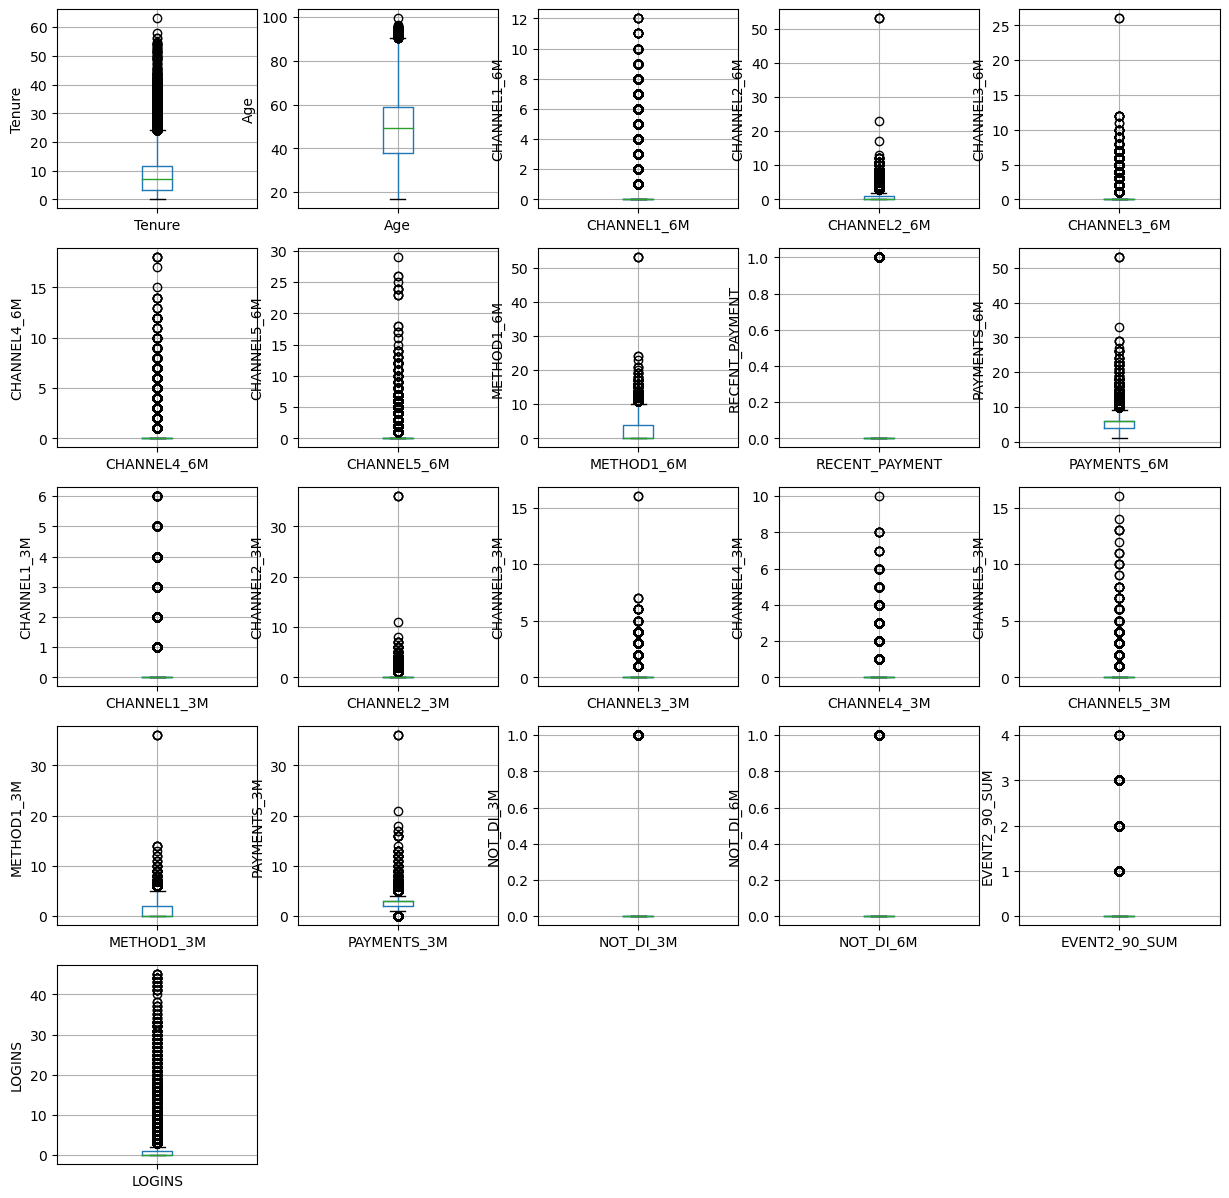

In [14]:
# visualize outliers in numerical variables
plt.figure(figsize=(15,15))

plt.subplot(5,5,1)
fig = data.boxplot(column='Tenure')
fig.set_ylabel('Tenure')

plt.subplot(5,5,2)
fig = data.boxplot(column='Age')
fig.set_ylabel('Age')

plt.subplot(5,5,3)
fig = data.boxplot(column='CHANNEL1_6M')
fig.set_ylabel('CHANNEL1_6M')

plt.subplot(5,5,4)
fig = data.boxplot(column='CHANNEL2_6M')
fig.set_ylabel('CHANNEL2_6M')

plt.subplot(5,5,5)
fig = data.boxplot(column='CHANNEL3_6M')
fig.set_ylabel('CHANNEL3_6M')

plt.subplot(5,5,6)
fig = data.boxplot(column='CHANNEL4_6M')
fig.set_ylabel('CHANNEL4_6M')

plt.subplot(5,5,7)
fig = data.boxplot(column='CHANNEL5_6M')
fig.set_ylabel('CHANNEL5_6M')

plt.subplot(5,5,8)
fig = data.boxplot(column='METHOD1_6M')
fig.set_ylabel('METHOD1_6M')

plt.subplot(5,5,9)
fig = data.boxplot(column='RECENT_PAYMENT')
fig.set_ylabel('RECENT_PAYMENT')

plt.subplot(5,5,10)
fig = data.boxplot(column='PAYMENTS_6M')
fig.set_ylabel('PAYMENTS_6M')

plt.subplot(5,5,11)
fig = data.boxplot(column='CHANNEL1_3M')
fig.set_ylabel('CHANNEL1_3M')

plt.subplot(5,5,12)
fig = data.boxplot(column='CHANNEL2_3M')
fig.set_ylabel('CHANNEL2_3M')

plt.subplot(5,5,13)
fig = data.boxplot(column='CHANNEL3_3M')
fig.set_ylabel('CHANNEL3_3M')

plt.subplot(5,5,14)
fig = data.boxplot(column='CHANNEL4_3M')
fig.set_ylabel('CHANNEL4_3M')

plt.subplot(5,5,15)
fig = data.boxplot(column='CHANNEL5_3M')
fig.set_ylabel('CHANNEL5_3M')

plt.subplot(5,5,16)
fig = data.boxplot(column='METHOD1_3M')
fig.set_ylabel('METHOD1_3M')

plt.subplot(5,5,17)
fig = data.boxplot(column='PAYMENTS_3M')
fig.set_ylabel('PAYMENTS_3M')

plt.subplot(5,5,18)
fig = data.boxplot(column='NOT_DI_3M')
fig.set_ylabel('NOT_DI_3M')

plt.subplot(5,5,19)
fig = data.boxplot(column='NOT_DI_6M')
fig.set_ylabel('NOT_DI_6M')

plt.subplot(5,5,20)
fig = data.boxplot(column='EVENT2_90_SUM')
fig.set_ylabel('EVENT2_90_SUM')

plt.subplot(5,5,21)
fig = data.boxplot(column='LOGINS')
fig.set_ylabel('LOGINS')

In [15]:
# identify columns with NA values
data.isna().sum()

RTD_ST_CD                  0
CustomerSegment            0
Tenure                     0
Age                        0
MART_STATUS                0
GENDER                     0
CHANNEL1_6M              809
CHANNEL2_6M              809
CHANNEL3_6M              809
CHANNEL4_6M              809
CHANNEL5_6M              809
METHOD1_6M               809
RECENT_PAYMENT           809
PAYMENTS_6M              809
CHANNEL1_3M                0
CHANNEL2_3M                0
CHANNEL3_3M                0
CHANNEL4_3M                0
CHANNEL5_3M                0
METHOD1_3M                 0
PAYMENTS_3M                0
NOT_DI_3M                  0
NOT_DI_6M                  0
EVENT1_30_FLAG             0
EVENT2_90_SUM              0
LOGINS                     0
POLICYPURCHASECHANNEL      0
Call_Flag                  0
YEAR                       0
MONTH                      0
DAY                        0
dtype: int64

In [16]:
# apply median imputation on NA values for all relevant columns
na_cols = ['CHANNEL1_6M', 'CHANNEL2_6M', 'CHANNEL3_6M', 'CHANNEL4_6M', 'CHANNEL5_6M', 'METHOD1_6M',
          'RECENT_PAYMENT', 'PAYMENTS_6M']

for idx, row in data.iterrows():
    for col in na_cols:
        if math.isnan(float(row[col])):
            median = data[col].median()
            data[col].fillna(median, inplace=True)

Text(0.5, 0, 'EVENT2_90_SUM')

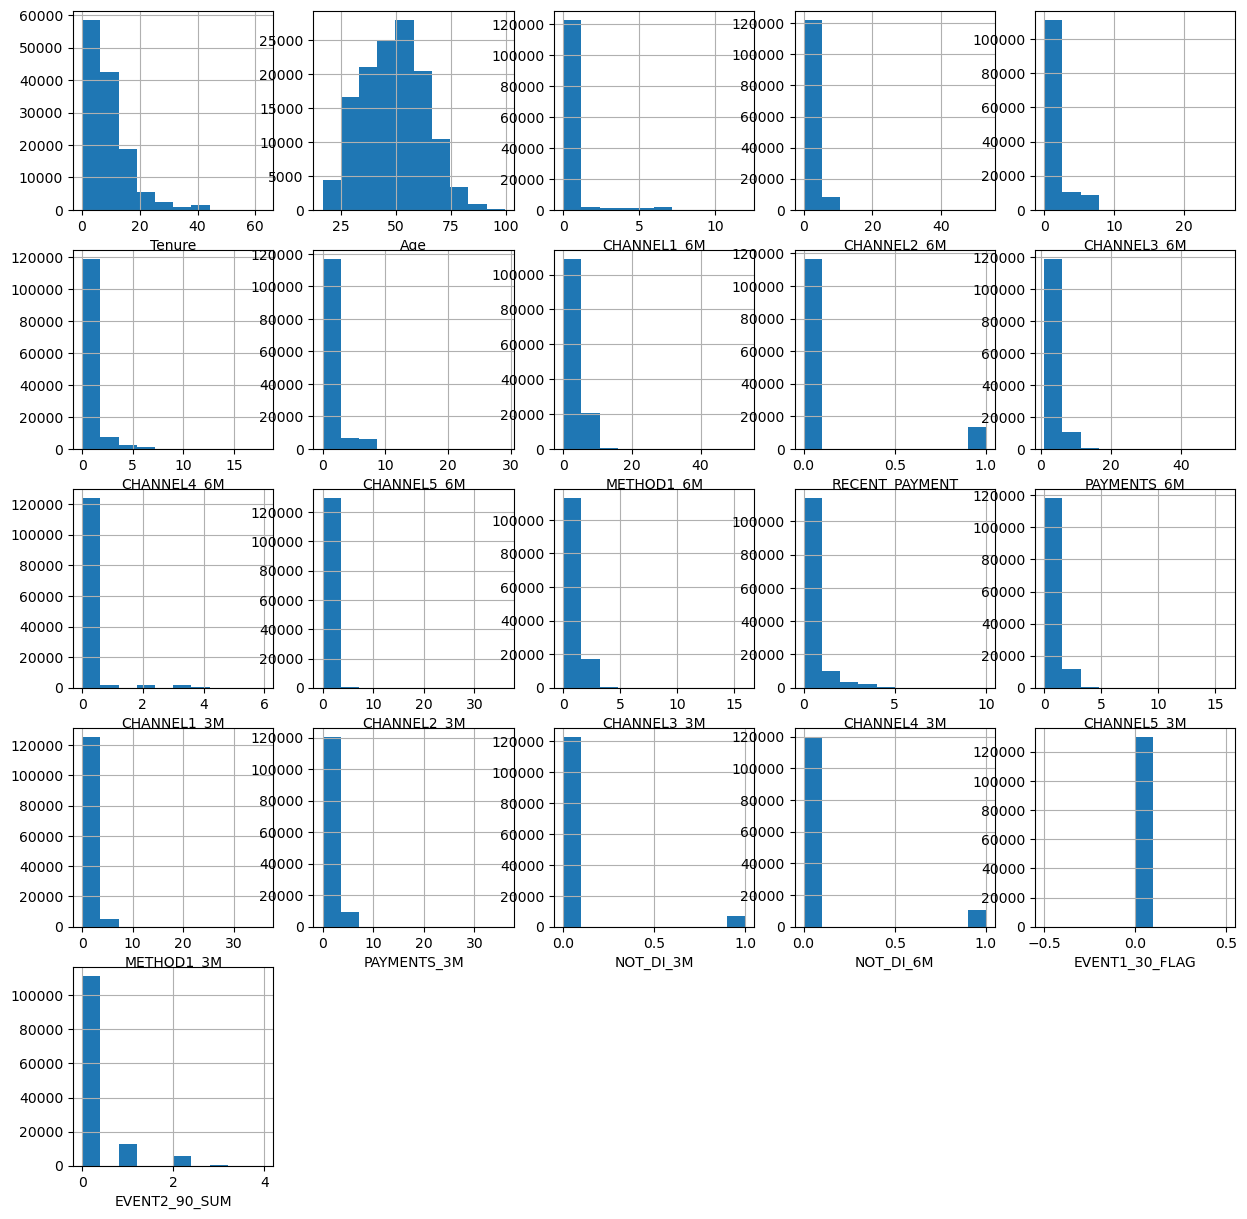

In [17]:
# visualize outliers in numerical variables
plt.figure(figsize=(15,15))

plt.subplot(5,5,1)
fig = data.Tenure.hist(bins=10)
fig.set_xlabel('Tenure')

plt.subplot(5,5,2)
fig = data.Age.hist(bins=10)
fig.set_xlabel('Age')

plt.subplot(5,5,3)
fig = data.CHANNEL1_6M.hist(bins=10)
fig.set_xlabel('CHANNEL1_6M')

plt.subplot(5,5,4)
fig = data.CHANNEL2_6M.hist(bins=10)
fig.set_xlabel('CHANNEL2_6M')

plt.subplot(5,5,5)
fig = data.CHANNEL3_6M.hist(bins=10)
fig.set_xlabel('CHANNEL3_6M')

plt.subplot(5,5,6)
fig = data.CHANNEL4_6M.hist(bins=10)
fig.set_xlabel('CHANNEL4_6M')

plt.subplot(5,5,7)
fig = data.CHANNEL5_6M.hist(bins=10)
fig.set_xlabel('CHANNEL5_6M')

plt.subplot(5,5,8)
fig = data.METHOD1_6M.hist(bins=10)
fig.set_xlabel('METHOD1_6M')

plt.subplot(5,5,9)
fig = data.RECENT_PAYMENT.hist(bins=10)
fig.set_xlabel('RECENT_PAYMENT')

plt.subplot(5,5,10)
fig = data.PAYMENTS_6M.hist(bins=10)
fig.set_xlabel('PAYMENTS_6M')

plt.subplot(5,5,11)
fig = data.CHANNEL1_3M.hist(bins=10)
fig.set_xlabel('CHANNEL1_3M')

plt.subplot(5,5,12)
fig = data.CHANNEL2_3M.hist(bins=10)
fig.set_xlabel('CHANNEL2_3M')

plt.subplot(5,5,13)
fig = data.CHANNEL3_3M.hist(bins=10)
fig.set_xlabel('CHANNEL3_3M')

plt.subplot(5,5,14)
fig = data.CHANNEL4_3M.hist(bins=10)
fig.set_xlabel('CHANNEL4_3M')

plt.subplot(5,5,15)
fig = data.CHANNEL5_3M.hist(bins=10)
fig.set_xlabel('CHANNEL5_3M')

plt.subplot(5,5,16)
fig = data.METHOD1_3M.hist(bins=10)
fig.set_xlabel('METHOD1_3M')

plt.subplot(5,5,17)
fig = data.PAYMENTS_3M.hist(bins=10)
fig.set_xlabel('PAYMENTS_3M')

plt.subplot(5,5,18)
fig = data.NOT_DI_3M.hist(bins=10)
fig.set_xlabel('NOT_DI_3M')

plt.subplot(5,5,19)
fig = data.NOT_DI_6M.hist(bins=10)
fig.set_xlabel('NOT_DI_6M')

plt.subplot(5,5,20)
fig = data.EVENT1_30_FLAG.hist(bins=10)
fig.set_xlabel('EVENT1_30_FLAG')

plt.subplot(5,5,21)
fig = data.EVENT2_90_SUM.hist(bins=10)
fig.set_xlabel('EVENT2_90_SUM')

**Data Pre-Processing: Feature Engineering**

In [97]:
# identify independent and target variables
X = data.drop(['Call_Flag'], axis=1)
y = data['Call_Flag']

In [98]:
# view categorical variables in training dataset
print(X[categorical_vars])

       RTD_ST_CD CustomerSegment MART_STATUS GENDER
0          ST_S0               1       MS_S0      F
1          ST_S0               1       MS_S1      F
2          ST_S0               1       MS_S2      M
3          ST_S1               1       MS_S2      M
4          ST_S0               1       MS_S0      F
...          ...             ...         ...    ...
130081    ST_S16            NONE       MS_S2      M
130082    ST_S41            NONE       MS_S1      M
130083    ST_S14            NONE       MS_S3      M
130084    ST_S14            NONE       MS_S2      M
130085     ST_S9               3       MS_S1      F

[130086 rows x 4 columns]


In [99]:
# encode categorical variables
encoder = ce.BinaryEncoder(cols=['RTD_ST_CD', 'CustomerSegment', 'MART_STATUS', 'GENDER'])
X = encoder.fit_transform(X)
print(X.head())

   RTD_ST_CD_0  RTD_ST_CD_1  RTD_ST_CD_2  RTD_ST_CD_3  RTD_ST_CD_4  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            1   
4            0            0            0            0            0   

   RTD_ST_CD_5  CustomerSegment_0  CustomerSegment_1  CustomerSegment_2  \
0            1                  0                  0                  1   
1            1                  0                  0                  1   
2            1                  0                  0                  1   
3            0                  0                  0                  1   
4            1                  0                  0                  1   

      Tenure  ...  PAYMENTS_3M  NOT_DI_3M  NOT_DI_6M  EVENT1_30_FLAG  \
0  16.175222  ...            3          0          0    

In [100]:
# SMOTE over-sampling
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [101]:
X_resampled.shape

(250644, 40)

In [103]:
# train-test-split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [104]:
# cap outliers
def cap_outliers(columns):
    for dat in [X_train, X_test]:
        for col in columns:
            IQR = dat[col].quantile(0.75) - dat[col].quantile(0.25)
            lower = dat[col].quantile(0.25) - (1.5 * IQR)
            upper = dat[col].quantile(0.75) + (1.5 * IQR)
            print(f'{col} outliers are < {lower} and > {upper}.'.format(lower, upper))
            
            dat[col] = np.where(dat[col] > upper, upper, dat[col])
        

cols = ['CHANNEL1_6M', 'CHANNEL2_6M', 'CHANNEL3_6M', 'CHANNEL4_6M', 'CHANNEL5_6M',
       'METHOD1_6M', 'RECENT_PAYMENT', 'PAYMENTS_6M', 'CHANNEL1_3M', 'CHANNEL2_3M',
       'Tenure', 'Age', 'CHANNEL3_3M', 'CHANNEL4_3M', 'CHANNEL5_3M', 'METHOD1_3M',
       'PAYMENTS_3M', 'NOT_DI_3M', 'NOT_DI_6M', 'EVENT1_30_FLAG', 'EVENT2_90_SUM']
cap_outliers(cols)

CHANNEL1_6M outliers are < 0.0 and > 0.0.
CHANNEL2_6M outliers are < -1.5 and > 2.5.
CHANNEL3_6M outliers are < 0.0 and > 0.0.
CHANNEL4_6M outliers are < -2.014915128919252 and > 3.3581918815320866.
CHANNEL5_6M outliers are < 0.0 and > 0.0.
METHOD1_6M outliers are < -6.0 and > 10.0.
RECENT_PAYMENT outliers are < 0.0 and > 0.0.
PAYMENTS_6M outliers are < -1.538789187229309 and > 10.523273512337585.
CHANNEL1_3M outliers are < 0.0 and > 0.0.
CHANNEL2_3M outliers are < 0.0 and > 0.0.
Tenure outliers are < -9.650022374295531 and > 23.01437982457732.
Age outliers are < 7.531828499999989 and > 91.09103250000001.
CHANNEL3_3M outliers are < 0.0 and > 0.0.
CHANNEL4_3M outliers are < 0.0 and > 0.0.
CHANNEL5_3M outliers are < 0.0 and > 0.0.
METHOD1_3M outliers are < -3.0 and > 5.0.
PAYMENTS_3M outliers are < -2.0 and > 6.0.
NOT_DI_3M outliers are < 0.0 and > 0.0.
NOT_DI_6M outliers are < 0.0 and > 0.0.
EVENT1_30_FLAG outliers are < 0.0 and > 0.0.
EVENT2_90_SUM outliers are < 0.0 and > 0.0.
CHANNEL

In [105]:
# normalization with MinMaxScaler
column_names = X_train.columns

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train = pd.DataFrame(X_train_scaled, columns=column_names)
X_test = pd.DataFrame(X_test_scaled, columns=column_names)

In [106]:
# convert training and testing sets to PyTorch tensors
X_train = torch.tensor(X_train.values)
X_test = torch.tensor(X_test.values)

y_train = torch.tensor(y_train.values)
y_test = torch.tensor(y_test.values)

**Model Training**

In [95]:
# construct neural network
class NN(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, hidden_dim3, dropout_rate):
        super(NN, self).__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim1)
        self.dropout1 = nn.Dropout(dropout_rate)
        self.layer2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.dropout2 = nn.Dropout(dropout_rate)
        self.layer3 = nn.Linear(hidden_dim2, hidden_dim3)
        self.dropout3 = nn.Dropout(dropout_rate)
        self.output = nn.Linear(hidden_dim3, 1)
    
    def forward(self, x):
        x = nn.functional.leaky_relu(self.layer1(x))
        x = self.dropout1(x)
        x = nn.functional.relu(self.layer2(x))
        x = self.dropout2(x)
        x = nn.functional.relu(self.layer3(x))
        x = self.dropout3(x)
        x = nn.functional.sigmoid(self.output(x))
        return x

input_dim = X_train.shape[1]
hidden_dim1 = 32
hidden_dim2 = 64
hidden_dim3 = 16
dropout_rate = 0.1

model = NN(input_dim, hidden_dim1, hidden_dim2, hidden_dim3, dropout_rate)

**Model Evaluation**

In [96]:
# evaluate model performance
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

epochs = 2000

for i in range(epochs):
    optimizer.zero_grad()
    pred = model.forward(X_train.float())
    loss = nn.functional.binary_cross_entropy(pred.squeeze(), y_train.float())
    loss.backward()
    optimizer.step()

    if i % 50 == 0:
        pred_test = model.forward(X_test.float())
        pred_labels = (pred_test.squeeze() > 0.5).int()
        
        accuracy = accuracy_score(y_test, pred_labels)
        precision = precision_score(y_test, pred_labels, zero_division=0)
        recall = recall_score(y_test, pred_labels)
        f1 = f1_score(y_test, pred_labels)
        
        print(f'Epoch: {i}, Loss: {loss.item()}, Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1: {f1}')

Epoch: 0, Loss: 0.693615198135376, Accuracy: 0.6066747790699994, Precision: 0.7876880401152245, Recall: 0.294026284348865, F1: 0.4282110025229823
Epoch: 50, Loss: 0.2456316202878952, Accuracy: 0.9001575934090048, Precision: 0.9114649420817813, Recall: 0.8868180007964954, F1: 0.8989725681758542
Epoch: 100, Loss: 0.213631734251976, Accuracy: 0.9122863013425363, Precision: 0.9273012336510295, Recall: 0.8950617283950617, F1: 0.9108963057531358
Epoch: 150, Loss: 0.20371466875076294, Accuracy: 0.9150591473997087, Precision: 0.9416299559471366, Recall: 0.8853046594982079, F1: 0.9125990393694323
Epoch: 200, Loss: 0.19702239334583282, Accuracy: 0.9177123022601688, Precision: 0.9356084194793872, Recall: 0.8974910394265233, F1: 0.9161534239892677
Epoch: 250, Loss: 0.19570542871952057, Accuracy: 0.9189092142272935, Precision: 0.9344011889526483, Recall: 0.9013938669852648, F1: 0.9176007945999636
Epoch: 300, Loss: 0.19102805852890015, Accuracy: 0.9208043248419079, Precision: 0.9330547361520812, Rec